# Initiate

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import tqdm
import selenium
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException 
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

import datetime


In [6]:
#Inisiasi 
s=Service('C:/SAINS DATA/chromedriver.exe')
options = webdriver.ChromeOptions()
options.add_experimental_option("detach", True)
options.add_argument('disable_infobars')
# options.headless = True

driver = webdriver.Chrome(service=s, options=options)
url="https://www.youtube.com/c/VancityReynolds/videos"
# url2 = "https://www.youtube.com/watch?v=QPQUrUS47Hg"
# url3 = 'https://www.youtube.com/watch?v=wh2bTMptuCA&t=2s'
# ftmm = 'https://www.youtube.com/channel/UCsAMAkGdR0kedB4iYlhQ4EA/videos'
# endang = 'https://www.youtube.com/channel/UCEvzoWUVWzp36qyagATw2sA/videos'
bp_wf = 'https://www.youtube.com/watch?v=RlOB3UALvrQ'

driver.get(bp_wf)
driver.maximize_window()


# Detail Scrapping

## Locate Element


In [143]:
#number of comments 
c = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
print(c.text.split(' ')[0])

1,207


In [94]:
#detail views
views_child = driver.find_element(By.CSS_SELECTOR, 'ytd-video-view-count-renderer[class = "style-scope ytd-video-primary-info-renderer"]')
print(views_child.text)

607,629 views


In [119]:
#get duration 
dur = driver.find_element(By.CLASS_NAME, 'ytp-time-duration')
print(dur.text)

3:18


In [ ]:
#check for short
short = driver.find_element(By.CSS_SELECTOR, 'span[aria-label="Shorts"]')
print(short.get_attribute('aria-label'))

Shorts


In [154]:
#if comment was turn off
no_comm = driver.find_element(By.CSS_SELECTOR, 'yt-formatted-string[id = "message"]')
no_comm2 = no_comm.text.replace('Learn more', '')
print(no_comm2)

Comments are turned off. 


In [284]:
#gate date
detail = driver.find_element(By.ID, 'info-strings') #parent
date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
print(date2.text)
if date2.text == '': 
    date_details.append('-')
    driver.back()
    time.sleep(1)
else :     
    # print(date2.text) 
    date_details.append(date2.text)
    driver.back()
    time.sleep(1)



Mar 24, 2022


In [226]:
#get text in a video
channel_vid = driver.find_element(By.ID, 'video-title')
channel_vid.click()
time.sleep(3)
driver.execute_script("window.scrollTo(0, 500);")
time.sleep(3)
# l = driver.find_element(By.CSS_SELECTOR, 'div[id = "top-level-buttons-computed"]')
# li = l.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class= "style-scope ytd-menu-renderer force-icon-button style-text"]')

print(teks.text)
c = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
print(c.text.split(' ')[0])


Creative Ladder
606,864 viewsJun 21, 2022
38K
DISLIKE
SHARE
SAVE
1,220


In [227]:
#get clean likes
teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
t = teks.text.replace('\n', ' ').split(' ')
suka = []
for i in t:
    if i.endswith('K'): 
        suka_int = int(i.replace('K', '').replace('.', ''))*100
        suka.append(suka_int)
        
print(suka)

[3800]


In [17]:
#get likes 
likes_parent = driver.find_element(By.ID, 'menu-container')
# likes = likes_parent.find_elements(By.CSS_SELECTOR, '*')
# print(likes[3].get_attribute('class'))

likes = likes_parent.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class = "style-scope ytd-menu-renderer force-icon-button style-text"]')
print(likes.text)

3


## Scroll

In [11]:
SCROLL_PAUSE_TIME = 0.8

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.CONTROL + Keys.HOME)
channel_vid = driver.find_elements(By.CSS_SELECTOR, 'a[id = "video-title"]')

## Start Little Scrap

In [15]:
title = driver.find_elements(By.ID, 'video-title')
views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
date = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
duration = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-thumbnail-overlay-time-status-renderer')

## Get Links

In [12]:
# get links
links = []
link = driver.find_elements(By.ID, 'thumbnail')
for i in link: 
    href = i.get_attribute('href')
    if href != None: 
        links.append(href)
        
print(len(links))

28


In [13]:
# filter shorts
no_shorts_vid = []
short_index = []
for i in links:
    if 'shorts' not in i:
        no_shorts_vid.append(i)
    else : 
        short_index.append(links.index(i))
        
print(len(no_shorts_vid))

28


### Get Links in Specific Number

In [75]:
SCROLL_PAUSE_TIME = 0.7

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # search for links
    links = []
    link = driver.find_elements(By.ID, 'thumbnail')
    link2=[]
    for i in link:
        if i not in link2:
            link2.append(i.get_attribute('href'))
    print(len(link2))
    
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if len(link) >= 300:
        break
    last_height = new_height

31
61
91
121
151
181
211
241
271
301


In [81]:
# remove None
for i in link2:
    if i == None:
        link2.remove(i)
print(len(link2))


300


## Start Scrapping

In [14]:
date_details = []
views_details = []
video_likes = []
video_comments = []
video_duration = []
n = 1

for ling in no_shorts_vid : 
    driver.get(ling)
    time.sleep(3.5)
    
    
    #GET LIKES
    likes_parent = driver.find_element(By.ID, 'menu-container')
    likes = likes_parent.find_element(By.CSS_SELECTOR, 'ytd-toggle-button-renderer[class = "style-scope ytd-menu-renderer force-icon-button style-text"]')
    video_likes.append(likes.text)
    # teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
    # t = teks.text.replace('\n', ' ').split(' ')
    # for i in t:
    #     if i.endswith('K'): 
    #         suka_int = int(i.replace('K', '').replace('.', ''))*100
    #         video_likes.append(suka_int)
    
    driver.execute_script("window.scrollTo(0, 640);")
    time.sleep(3)
    #GET COMMENTS
    try : 
        com = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
        comments = com.text.replace(',', '').split(' ')[0]
        video_comments.append(int(comments))
    except :
        no_comm = driver.find_element(By.CSS_SELECTOR, 'yt-formatted-string[id = "message"]')
        no_comm2 = no_comm.text.replace('Learn more', '')
        video_comments.append(no_comm2)
    
    #GET VIEWS
    num_of_views = driver.find_element(By.CSS_SELECTOR, 'ytd-video-view-count-renderer[class = "style-scope ytd-video-primary-info-renderer"]')
    # print(num_of_views.text)
    true_views = num_of_views.text.split(' ')[0]
    views_details.append(true_views)
    
    #GET DURATION
    # dur = driver.find_element(By.CLASS_NAME, 'ytp-time-duration')
    # duration_time = dur.text
    # video_duration.append(duration_time)
    
    # GET DATE
    detail = driver.find_element(By.ID, 'info-strings') #parent
    date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
    if date2.text == '': 
        date_details.append('-')

    else :     
        print(date2.text) 
        date_details.append(date2.text)

    print(f'{n}. {driver.title} -> views = {true_views}, likes = {likes.text}, comments = {comments}')
    n = n + 1

Jun 26, 2022
1. PDD UKTPT Bidang Pengajaran - SERDOS SMART 2022 - Endang Sholihatin - YouTube -> views = 95, likes = 3, comments = 1
Jun 22, 2022
2. Dr Endang Sholihatin S. Pd. ,M. Pd. Mengajar Kalimat Efektif - YouTube -> views = 160, likes = 3, comments = 1
Jun 1, 2022
3. reels 3 pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 24, likes = 0, comments = 0
Jun 1, 2022
4. reels 2 pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 47, likes = 2, comments = 0
Jun 1, 2022
5. reels pengmas SMPN 1 Balongbendo Sidoarjo 30 Mei 2022 - YouTube -> views = 17, likes = 1, comments = 0
Jun 1, 2022
6. PENGMAS PENINGKATAN KOMPETENSI GURU INOVASI MEDIA PEMBELAJARAN DI SMPN 1 BALONGBENDO SIDOARJO - YouTube -> views = 35, likes = 4, comments = 0
Oct 12, 2021
7. PEMAKAIAN HURUF KAPITAL, MIRING, DAN TEBAL - Ejaan Baku Bahasa Indonesia (PUEBI/EYD) - YouTube -> views = 1,966, likes = 88, comments = 0
Oct 12, 2021
8. PENULISAN KATA - Ejaan Baku Bahasa Indonesia (PUEBI/EY

## Remove Shorts

In [16]:
for i in title : 
    if title.index(i) in short_index:
        title.remove(i)

for i in views : 
    if views.index(i) in short_index:
        views.remove(i)
        
for i in date : 
    if date.index(i) in short_index:
        date.remove(i)
        
for i in duration : 
    if duration.index(i) in short_index:
        duration.remove(i)


In [219]:
print(len(title))

168


## Store in Dataframe

In [19]:
dict_videos = {
    # 'Title' : [i.text for i in title],
    # 'Views' : [i.text for i in views],
    # 'Date' : [i.text for i in date], 
    # 'Duration' : [i.text for i in duration],  
    'Date Detail' : date_details, 
    'View Detail' : views_details, 
    'Number of Likes' : video_likes,
    'Number of Comments' : video_comments
}

In [20]:
#make dataframe
youtube = pd.DataFrame(dict_videos)
youtube

,Date Detail,View Detail,Number of Likes,Number of Comments
0,"Jun 26, 2022",95,3,1
1,"Jun 22, 2022",160,3,1
2,"Jun 1, 2022",24,0,0
3,"Jun 1, 2022",47,2,0
4,"Jun 1, 2022",17,1,0
5,"Jun 1, 2022",35,4,0
6,"Oct 12, 2021","1,966",88,0
7,"Oct 12, 2021","2,456",98,0
8,"Oct 4, 2021","3,108",122,1
9,"Sep 29, 2021","3,050",182,2


## Save as CSV

In [222]:
youtube.to_csv('Ryan Reynolds Youtube Data.csv')
print('Saved!')

Saved!


## Data Preprocessing

### Change Date Format

In [234]:
new_date = []
for d in youtube['Date Detail'].values:
    try : 
        reformat = datetime.datetime.strptime(d, '%b %d, %Y').strftime('%d-%m-%Y')
        new_date.append(reformat)
    except ValueError: 
        no_premiered = d.replace('Premiered ', '')
        reformat = datetime.datetime.strptime(no_premiered, '%b %d, %Y').strftime('%d-%m-%Y')
        new_date.append(reformat)
        
youtube['Date Detail'] = new_date
youtube


,Title,Views,Date,Duration,Date Detail,View Detail,Number of Likes,Number of Comments
0,Creative Ladder,614K views,3 weeks ago,1:35,21-06-2022,"614,148",3800,1203
1,Record Deflation,304K views,4 weeks ago,0:31,15-06-2022,"304,342",2000,1024
2,Nick Cannon's Vasectomy,1M views,1 month ago,1:36,09-06-2022,"1,038,646",5400,1648
3,Spokesmom,556K views,2 months ago,0:31,08-05-2022,"556,332",2800,855
4,Mother's Ruin Punch,2.3M views,2 months ago,1:17,06-05-2022,"2,307,871",8400,1492
...,...,...,...,...,...,...,...,...
163,💀💩L TV Spot 2,167K views,6 years ago,0:31,18-01-2016,"167,534",4500,189
164,New TV Spot. Is that a helicarrier?,220K views,6 years ago,0:31,17-01-2016,"220,889",5500,185
165,Deadpool's Empire magazine infomercial,737K views,6 years ago,1:43,29-12-2015,"737,480",2100,767
166,The 'Pool Log,656K views,6 years ago,1:09:05,24-12-2015,"656,643",1400,854


### Change "View Detail"

In [241]:
new_view = []
for v in youtube['View Detail'].values : 
    reformat2 = int(v.replace(',', ''))
    new_view.append(reformat2)

youtube['View Detail'] = new_view
youtube

,Title,Views,Date,Duration,Date Detail,View Detail,Number of Likes,Number of Comments
0,Creative Ladder,614K views,3 weeks ago,1:35,21-06-2022,614148,3800,1203
1,Record Deflation,304K views,4 weeks ago,0:31,15-06-2022,304342,2000,1024
2,Nick Cannon's Vasectomy,1M views,1 month ago,1:36,09-06-2022,1038646,5400,1648
3,Spokesmom,556K views,2 months ago,0:31,08-05-2022,556332,2800,855
4,Mother's Ruin Punch,2.3M views,2 months ago,1:17,06-05-2022,2307871,8400,1492
...,...,...,...,...,...,...,...,...
163,💀💩L TV Spot 2,167K views,6 years ago,0:31,18-01-2016,167534,4500,189
164,New TV Spot. Is that a helicarrier?,220K views,6 years ago,0:31,17-01-2016,220889,5500,185
165,Deadpool's Empire magazine infomercial,737K views,6 years ago,1:43,29-12-2015,737480,2100,767
166,The 'Pool Log,656K views,6 years ago,1:09:05,24-12-2015,656643,1400,854


## Save to CSV after Data Preprocessing

In [242]:
youtube.to_csv('Ryan Reynolds Youtube Data_Revision.csv')
print('Saved!')

Saved!


# Little Scrap 

In [22]:
title = driver.find_elements(By.ID, 'video-title')
views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
date = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
duration = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-thumbnail-overlay-time-status-renderer')

In [23]:
youtube_data = {
    'Title' : [i.text for i in title],
    'Views' : [i.text for i in views],
    'Date' : [i.text for i in date], 
    'Duration' : [i.text for i in duration]
}


In [24]:
youtube_df = pd.DataFrame(youtube_data)
youtube_df.head(10)

,Title,Views,Date,Duration
0,PDD UKTPT Bidang Pengajaran - SERDOS SMART 202...,95 views,3 weeks ago,29:25
1,"Dr Endang Sholihatin S. Pd. ,M. Pd. Mengajar K...",160 views,3 weeks ago,32:37
2,reels 3 pengmas SMPN 1 Balongbendo Sidoarjo 30...,24 views,1 month ago,1:28
3,reels 2 pengmas SMPN 1 Balongbendo Sidoarjo 30...,47 views,1 month ago,1:29
4,reels pengmas SMPN 1 Balongbendo Sidoarjo 30 M...,17 views,1 month ago,2:55
5,PENGMAS PENINGKATAN KOMPETENSI GURU INOVASI ME...,35 views,1 month ago,53:53
6,"PEMAKAIAN HURUF KAPITAL, MIRING, DAN TEBAL - E...",1.9K views,9 months ago,22:38
7,PENULISAN KATA - Ejaan Baku Bahasa Indonesia (...,2.4K views,9 months ago,32:29
8,KALIMAT EFEKTIF,3.1K views,9 months ago,19:39
9,Ragam Bahasa,3K views,9 months ago,41:13


In [25]:
youtube_df.shape

(28, 4)

In [ ]:
driver.quit()

## Data Preprocessing

In [ ]:
true_num = []
for i in youtube_df.Views:
    number_of_views = i.split(' ')[0]
    if 'K' in number_of_views: 
        num_without_k = number_of_views.replace('K', '')
        num_without_dot = int(num_without_k.replace('.', ''))
        true_num.append(int(num_without_dot*100))
    else : 
        true_num.append(int(number_of_views))
        
print(true_num)    
    

In [ ]:
youtube_df['Views'] = true_num
youtube_df.sort_values(by='Views', ascending=False).head(10)

,Title,Views,Date,Duration
534,SBMPTN 2020 - Soal TPA Aritmatika - Soal untuk...,32700,4 years ago,15:38
459,SBMPTN 2020 - TPA Barisan Beda - Banyak yang t...,14700,2 years ago,
440,UTBK 2020 - Aritmatika Figural - Ini Soal TPS ...,10500,2 years ago,
418,CEREJUR - Ilmu Keperawatan UNPAD,9600,2 years ago,3:35
325,Daftar Beasiswa Luar Negeri | Program S1,9600,1 year ago,
477,CEREJUR - Pendidikan Dokter UNPAD (Kedokteran-...,9500,3 years ago,5:47
297,Tata cara pembayaran TRY OUT CEREBRUM Bank Man...,9200,1 year ago,2:35
512,CEREJUR - Farmasi (SF ITB),9100,3 years ago,4:37
460,SBMPTN 2020 - TPA Barisan Ratio - Sering kelua...,8900,2 years ago,
488,CEREJUR - Teknik Pertambangan (FTTM ITB),8800,3 years ago,


# Trial and Error

In [ ]:
date_details = []
video_likes = []
video_comments = []
n = 1

for video in channel_vid[10:20]: 
    # driver.implicitly_wait(3)    
    video.click()
    time.sleep(5)
    
    #SCROLL 
    driver.execute_script("window.scrollTo(0, 500);")
    driver.implicitly_wait(5)
    
    #GET LIKES 
    teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
    t = teks.text.replace('\n', ' ').split(' ')
    for i in t:
        if i.endswith('K'): 
            suka_int = int(i.replace('K', '').replace('.', ''))*100
            video_likes.append(suka_int)
    
    #GET COMMENTS
    com = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
    comments = com.text.replace(',', '').split(' ')[0]
    video_comments.append(int(comments))
    
    # GET DATE
    detail = driver.find_element(By.ID, 'info-strings') #parent
    date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
    if date2.text == '': 
        date_details.append('-')
        driver.back()
        time.sleep(1)
    else :     
        print(date2.text) 
        date_details.append(date2.text)
        driver.back()
        time.sleep(3)
    
    print(f'Video {n} -> likes = {suka_int}, comments = {comments}')
    n = n + 1
    

# Black Panther

In [22]:
SCROLL_PAUSE_TIME = 4

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [23]:
# get comment
comment_text = [i.text for i in driver.find_elements(By.ID, 'content-text')]
for i in comment_text: 
    print(i)
    # time.sleep(1)

Loved the transition from "No Woman No Cry" to "Alright" 
Its so amazing to see how memorable Black Panther's character has become for everyone...Its an emotion, teaches so much about life and brings hope...RIP Panther...We miss you...
Whoever did this teaser needs a raise, this is a masterpiece
There’s an indescribable energy to this trailer and I can’t stop watching it.
“I am queen of the most powerful nation in the world and my entire family is gone! Have I not given everything?!” That line and the trailer as a whole sent chills down my spine. Can’t wait to see this.
Hands down one of the best teaser trailers I’ve ever seen for a film. It resonates because of the fact that Chadwick is no longer with us and the acting from only a few lines of dialogue profoundly emote that very real sadness across a fictional landscape. Kudos to Ryan Coogler and team. This looks like it’s going to be an amazing film!
The trembling and the intensity in the voice of Ramonda is heartbreaking. We can fee

In [24]:
# get comment likes
comment_likes = ['0' if i.text == '' else i.text for i in driver.find_elements(By.ID, 'vote-count-middle')]
# print(comment_likes)
print(len(comment_likes))

3071


In [25]:
name = []

header = driver.find_elements(By.ID, 'header-author')
for i in header:
    author = i.find_element(By.ID, 'author-text')
    big_author = i.find_element(By.CSS_SELECTOR, 'span[id = "author-comment-badge"]')
    if author.text != '':
        print(author.text)
        name.append(author.text)
    elif author.text == '':
        print(big_author.text)
        name.append(big_author.text)

SyrebralVibes
Jackson Ferrao
Christina L.
Christopher Nunn
Parle - G Mama Ajith Uncle🤣
John Sanchez
Jung Eirini
Horror Muppet
Blood Clover
djnkosi
Alvin Fan
Jesse_Mang
Doctor Aaron
Jermaine Allen
Sheetal Takkar
Catherine Ryan
Naphtali Ban Yasharalha
Maximus Prime
Benton Grant
Alicia Caley
Emilee Mayberry
BS Killa
The Database
John Kelly
Tony Hines
Mohammed S.Attalah
TreDoesitBetter
WildBoysTV
Scenic Fights
Terisha DeDeaux
Shanny StRR
R. James
Caden Martinez
ibechuu
The Canadian Lad
Rittika Sengupta
Nerd Girl
Jason Freeman
The Melanin Movement
Vasero
Rapsodi - JKT48
Ravi Raj
K R
Candace Pearson
D-Unit
mysterypelican
Jas Dabla
tigerstormAU
Shaniqua Walthour
Christopher Jennings
Julia Margarethe
Wild Wesley
George McNeese
Mysterious Music
Claira-𝐹**СК МЕ - СНЕ𝒞𝒦 𝑀𝒴 Р𝑅𝟢𝐹𝐼𝐿Е
cat
Princess Serenity
jamjam blue
wolfenstar nice
Stephanie Black
Mumin Rafiu
LongLiveUli13
Sunny247
To Unbecome 101
tharani dharan
Brandon Chavez
Katt Luna
Quaid T
Roy
Jinal Oswal
Aster Wesselink
Anuska Bhatta
Chaser_ 

In [34]:
replies = []

reply = driver.find_elements(By.ID, 'replies')

for rep in reply:
    try : 
        reply_child = rep.find_element(By.CSS_SELECTOR, 'ytd-comment-replies-renderer[class = "style-scope ytd-comment-thread-renderer"]')
        if reply_child.text == 'View reply':
            replies.append('1 reply')
        else : 
        # print(reply_child.text)
            replies.append(reply_child.text.replace('View', ''))
    except NoSuchElementException: 
        # print('0 REPLY')
        replies.append('0 reply')

In [35]:
print(replies)

[' 323 replies', ' 13 replies', ' 23 replies', ' 6 replies', ' 9 replies', ' 3 replies', ' 38 replies', ' 11 replies', '1 reply', '1 reply', ' 4 replies', '0 reply', ' 96 replies', '0 reply', '0 reply', '1 reply', '0 reply', '0 reply', ' 14 replies', '0 reply', '0 reply', '0 reply', '0 reply', ' 28 replies', '0 reply', '0 reply', '0 reply', '0 reply', ' 33 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 433 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 31 replies', '0 reply', '0 reply', '0 reply', '1 reply', '0 reply', ' 12 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 10 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 46 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 9 replies', '0 reply', '0 reply', '0 reply', '0 reply', ' 11 replies', '0 reply', '0 reply', '0 reply', '0 reply', '0 reply', ' 16 replies', '0 reply', '0 re

In [27]:
publish = [i.text for i in driver.find_elements(By.CSS_SELECTOR, 'yt-formatted-string[class = "published-time-text style-scope ytd-comment-renderer"]')]
# print(publish)

In [37]:
youtube_comments_dict = {
    'Name' : name,
    'Comments' : comment_text,
    'Likes' : comment_likes,
    'Replies' : replies,
    'Published' : publish
}

youtube_comments_df = pd.DataFrame(youtube_comments_dict)
youtube_comments_df.head(10)

,Name,Comments,Likes,Replies,Published
0,SyrebralVibes,"Loved the transition from ""No Woman No Cry"" to...",53K,323 replies,4 days ago
1,Jackson Ferrao,Its so amazing to see how memorable Black Pant...,832,13 replies,10 hours ago (edited)
2,Christina L.,"Whoever did this teaser needs a raise, this is...",1.4K,23 replies,12 hours ago
3,Christopher Nunn,There’s an indescribable energy to this traile...,231,6 replies,7 hours ago
4,Parle - G Mama Ajith Uncle🤣,“I am queen of the most powerful nation in the...,706,9 replies,9 hours ago
5,John Sanchez,Hands down one of the best teaser trailers I’v...,147,3 replies,4 hours ago
6,Jung Eirini,The trembling and the intensity in the voice o...,3.3K,38 replies,1 day ago
7,Horror Muppet,I've been wanting to see Namor hit this big sc...,364,11 replies,13 hours ago
8,Blood Clover,"I love the execution of this teaser, super imp...",153,1 reply,13 hours ago
9,djnkosi,No hyperbole: this may be the greatest trailer...,25,1 reply,9 hours ago


In [38]:
youtube_comments_df.to_csv('Wakanda Forever Teaser_Youtube Comment.csv')
print('saved!')

saved!


In [379]:
# example of get child from element
header = driver.find_elements(By.ID, 'header-author')

all_children_by_css = header[1].find_elements(By.CSS_SELECTOR, "*")
all_children_by_xpath = header[1].find_elements(By.XPATH, ".//*")

# print(all_children_by_css[3].get_attribute('id'))
mas = header[1].find_element(By.CSS_SELECTOR, 'span[id = "author-comment-badge"]')
print(mas.text)


marsgizmo


## Wordcloud Visualization

In [30]:
comm_df = pd.read_csv('Wakanda Forever Teaser_Youtube Comment.csv')

In [31]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for v in comm_df['Comments']:
    # split the value
    tokens = str(v).split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

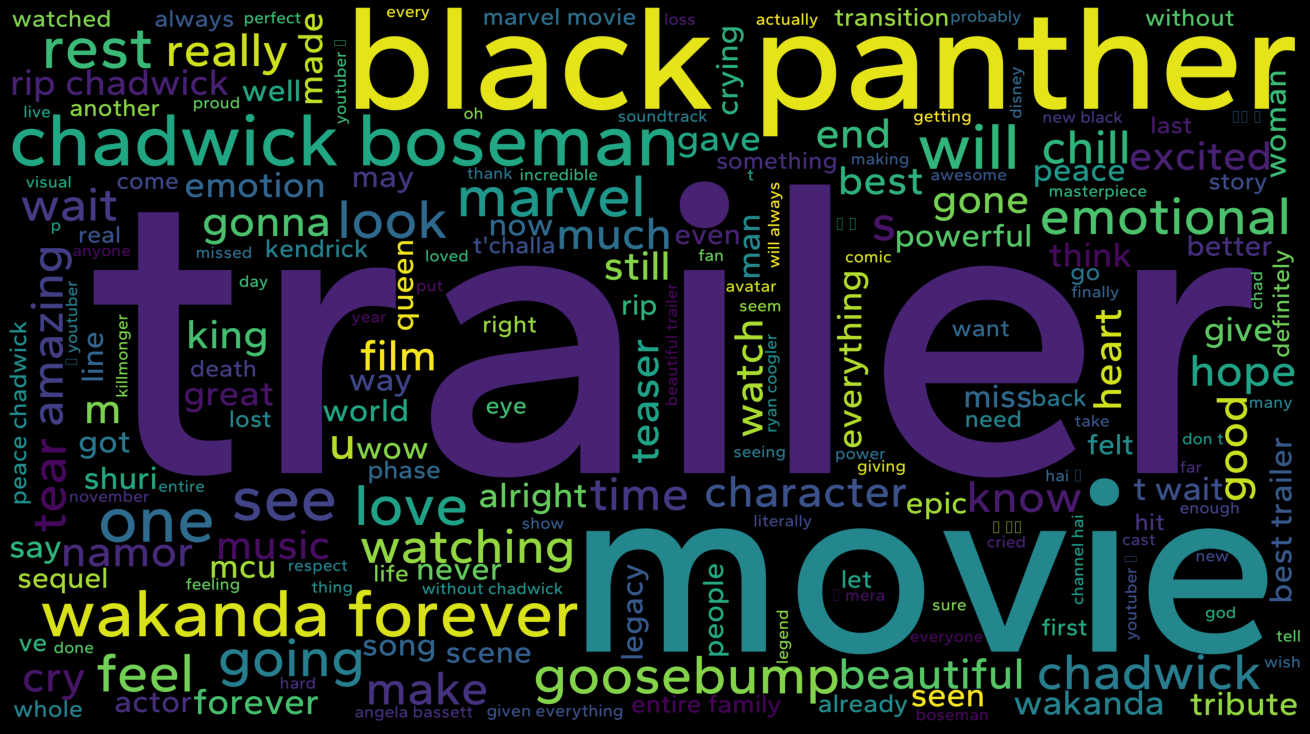

In [32]:
wordcloud = WordCloud(width = 1800, height = 1000,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 20,
                max_font_size= 600,
                scale = 1.5, 
                font_path = 'C:/SAINS DATA/Font/fonts/otf/Gantari-Medium.otf').generate(comment_words)

plt.figure(figsize = (18, 16), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Raditya Dika

In [87]:
#Inisiasi 
s=Service('C:/SAINS DATA/msedgedriver.exe')
options = webdriver.EdgeOptions()
options.add_experimental_option("detach", True)
options.add_argument('disable_infobars')

url = 'https://www.youtube.com/@radityadika/videos'

driver = webdriver.Edge(service=s, options=options)
driver.get(url)

In [52]:
SCROLL_PAUSE_TIME = 0.7
link_list = []

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # search for links
    link = driver.find_elements(By.ID, 'thumbnail')
    for i in link:
        try:
            if i.get_attribute('href') != None:
                link_list.append(i.get_attribute('href'))
            elif i.get_attribute('href') == None:
                continue
        except AttributeError:
            continue
    
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    print(f'{len(set(link_list))} number of videos scraped')
    if len(set(link_list)) >= 500:
        break
    last_height = new_height

30 numberd of videos scraped
60 numberd of videos scraped
90 numberd of videos scraped
120 numberd of videos scraped
120 numberd of videos scraped
180 numberd of videos scraped
210 numberd of videos scraped
240 numberd of videos scraped
270 numberd of videos scraped
300 numberd of videos scraped
330 numberd of videos scraped
360 numberd of videos scraped
390 numberd of videos scraped
420 numberd of videos scraped
450 numberd of videos scraped
480 numberd of videos scraped
480 numberd of videos scraped
510 numberd of videos scraped


In [54]:
good_link_list = list(set(link_list))
len(good_link_list)

510

## Get Comments for Every Video

In [124]:
yt_com = []
yt_link = []
name = []
replies = []


for i in tqdm.tqdm(good_link_list[0:2]):
    driver.get(i)
    time.sleep(2)
    
    driver.execute_script("window.scrollTo(0, 720);")
    time.sleep(2)
    SCROLL_PAUSE_TIME = 2.5

    # Get scroll height
    last_height = driver.execute_script("return document.documentElement.scrollHeight")

    # WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div[id = "body"]')))
    
    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

        # Wait to load page
        time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        
        if new_height == last_height:
            break
        last_height = new_height
    
    # get author
    header = driver.find_elements(By.ID, 'header-author')
    for i in header:
        author = i.find_element(By.ID, 'author-text')
        big_author = i.find_element(By.CSS_SELECTOR, 'span[id = "author-comment-badge"]')
        if author.text != '':
            # print(author.text)
            name.append(author.text)
        elif author.text == '':
            # print(big_author.text)
            name.append(big_author.text)
    
    # get comment likes
    comment_likes = ['0' if i.text == '' else i.text for i in driver.find_elements(By.ID, 'vote-count-middle')]
    
    # get comment
    comment_text = [i.text for i in driver.find_elements(By.ID, 'content-text')]
    for j in comment_text:
        yt_link.append(i)
        
    # #get reply
    # reply = driver.find_elements(By.ID, 'replies')

    # for rep in reply:
    #     try : 
    #         reply_child = rep.find_element(By.CSS_SELECTOR, 'ytd-comment-replies-renderer[class = "style-scope ytd-comment-thread-renderer"]')
    #         if reply_child.text == 'View reply':
    #             replies.append('1 reply')
    #         else : 
    #         # print(reply_child.text)
    #             replies.append(reply_child.text.replace('View', ''))
    #     except NoSuchElementException: 
    #         # print('0 REPLY')
    #         replies.append('0 reply')
        

 50%|█████     | 1/2 [00:42<00:42, 42.30s/it]


KeyboardInterrupt: 

In [123]:
len(comment_likes)

5

In [121]:
youtube_comments_RD = {
    'Link' : yt_link,
    'Name' : name,
    'Comments' : comment_text,
    'Likes' : comment_likes
}

df_youtube_comments_RD = pd.DataFrame(youtube_comments_RD)
df_youtube_comments_RD.head(10)

ValueError: All arrays must be of the same length

In [74]:
len(comment_text)

251

In [67]:
date_details = []
views_details = []
video_likes = []
video_comments = []
video_duration = []
delay = 7
n = 1

for ling in good_link_list[0:10] : 
    driver.get(ling)
    time.sleep(3.5)
    
    #GET LIKES
    likes = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, 
                                                                            'div[class = "yt-spec-button-shape-next__button-text-content"]')))
    # likes = likes_parent.find_element(By.CSS_SELECTOR, 'div[class = "yt-spec-button-shape-next__button-text-content"]')
    video_likes.append(likes.text)
    # teks = driver.find_element(By.CLASS_NAME, 'style-scope ytd-video-primary-info-renderer')
    # t = teks.text.replace('\n', ' ').split(' ')
    # for i in t:
    #     if i.endswith('K'): 
    #         suka_int = int(i.replace('K', '').replace('.', ''))*100
    #         video_likes.append(suka_int)
    
    driver.execute_script("window.scrollTo(0, 720);")
    time.sleep(2)
    #GET COMMENTS
    try : 
        com = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'h2[id = "count"]')))
        # com = driver.find_element(By.CSS_SELECTOR, 'h2[id = "count"]')
        comments = com.text.replace(',', '').split(' ')[0]
        video_comments.append(int(comments))
    except :
        no_comm = driver.find_element(By.CSS_SELECTOR, 'yt-formatted-string[id = "message"]')
        no_comm2 = no_comm.text.replace('Learn more', '')
        video_comments.append(no_comm2)
    
    #GET VIEWS
    num_of_views = driver.find_element(By.ID, 'info')
    print(num_of_views.text)
    # true_views = num_of_views.text.split(' ')[0]
    # views_details.append(true_views)
    
    #GET DURATION
    dur = driver.find_element(By.CLASS_NAME, 'ytp-time-duration')
    duration_time = dur.text
    video_duration.append(duration_time)
    
    # GET DATE
    detail = driver.find_element(By.ID, 'info-strings') #parent
    date2 = detail.find_element(By.CSS_SELECTOR, 'yt-formatted-string[class = "style-scope ytd-video-primary-info-renderer"]')
    if date2.text == '': 
        date_details.append('-')

    else :     
        print(date2.text) 
        date_details.append(date2.text)

    print(f'{n}. {driver.title} -> views = {true_views}, likes = {likes.text}, comments = {comments}')
    n = n + 1


1. Diajarin Bisnis Sama Ruben Onsu - YouTube -> views = , likes = , comments = 722

2. Paranormal Experience: Klarifikasi Hantu Anak - YouTube -> views = , likes = , comments = 780

3. Makanan Keluarga Saya Diatur Ahli Gizi! Begini Rasanya… - YouTube -> views = , likes = Subscribe, comments = 360

4. Ke Singapura Beli Ayam - YouTube -> views = , likes = , comments = 817


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"yt-formatted-string[id = "message"]"}
  (Session info: MicrosoftEdge=126.0.2592.113); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF72B088132+13538]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF72B011DE9+595465]
	(No symbol) [0x00007FF72AE2E6CF]
	(No symbol) [0x00007FF72AE72960]
	(No symbol) [0x00007FF72AE72A1F]
	(No symbol) [0x00007FF72AEAD627]
	(No symbol) [0x00007FF72AE9203F]
	(No symbol) [0x00007FF72AE68147]
	(No symbol) [0x00007FF72AEAB1EE]
	(No symbol) [0x00007FF72AE91C63]
	(No symbol) [0x00007FF72AE6766E]
	(No symbol) [0x00007FF72AE6683C]
	(No symbol) [0x00007FF72AE67221]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF72B2496D4+1099860]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF72AF8D8FC+53532]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF72AF80E25+1605]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF72B248665+1095653]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF72B01C961+27777]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF72B016CE4+4100]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF72B016E1B+4411]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF72B00CFA0+575424]
	BaseThreadInitThunk [0x00007FFB10E9257D+29]
	RtlUserThreadStart [0x00007FFB1222AF28+40]


In [68]:
num_of_views = driver.find_element(By.ID, 'info')
print(num_of_views.text)